In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from datetime import datetime
from scipy import ndimage

%matplotlib widget

from jfunctions import *

In [2]:
#Load simulation data
b, w, times = load_data('th3_xz', 'w_xz')
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['B_xy', 'B_xz', 'B_yz', 'Ent_phic_flux_int', 'Ent_phic_flux_rec', 'Ent_phiv_flux_int', 'Ent_phiv_flux_rec', 'N2_xy', 'N2_xz', 'N2_yz', 'Re_b_xy', 'Re_b_xz', 'Re_b_yz', 'Ri_xy', 'Ri_xz', 'Ri_yz', 'b_phic_F1', 'b_phic_F3', 'b_phic_M', 'b_phic_S', 'b_phic_W', 'b_phiv_F1', 'b_phiv_F2', 'b_phiv_M', 'b_phiv_S', 'b_phiv_W', 'chi1_xy', 'chi1_xz', 'chi1_yz', 'chi2_xy', 'chi2_xz', 'chi2_yz', 'chi3_xy', 'chi3_xz', 'chi3_yz', 'diff_th1_xy', 'diff_th1_xz', 'diff_th1_yz', 'diff_th2_xy', 'diff_th2_xz', 'diff_th2_yz', 'diff_th3_xy', 'diff_th3_xz', 'diff_th3_yz', 'epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'kappa_t3_xy', 'kappa_t3_xz', 'kappa_t3_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz', 'th2_xy', 'th2_xz', 'th2_yz', 'th3_xy', 'th3_xz', 'th3_yz', 'th_forci

In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 5.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.02, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.25, 'phiv_factor': 1.0, 'phic_factor': 3.0, 'Nb': 128.0, 'Nphi': 128.0, 'F_TYPE': 3.0, 'alpha': 67.0, 'beta': 0.51, 'tau': 1.0, 'q0': 0.05, 'phiv_min': 0.0001, 'phic_min': 0.0005, 'Nx': 512, 'Ny': 512, 'Nz': 513, 'Nth': 3}


In [4]:
#Create grid
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 17
Dimensional times:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.  ]


In [5]:
w_filtered = np.zeros_like(w)
b_filtered = np.zeros_like(b)

for i in range(NSAMP):
    w_filtered[i] = ndimage.gaussian_filter(w[i], 2)
    b_filtered[i] = ndimage.gaussian_filter(b[i], 2)

w = w_filtered

N2 = np.gradient(b_filtered, gzf, axis=1)
N2t = np.gradient(N2, times, axis=0)

Setting up data arrays...


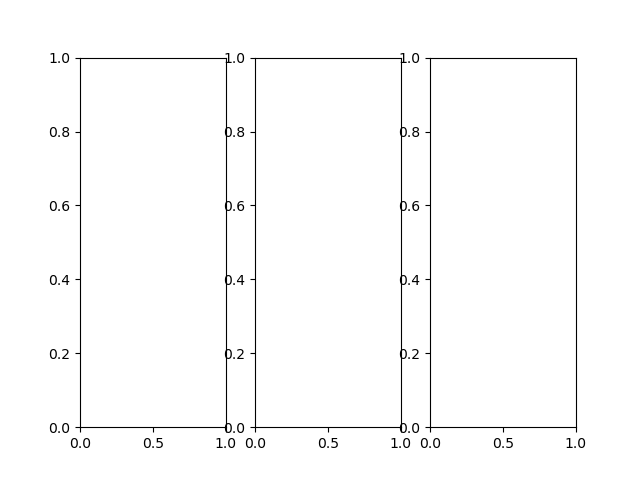

In [6]:
print("Setting up data arrays...")
fig, axs = plt.subplots(1,3)
ims = np.array([None,None,None])
cb = np.array([None,None,None])

In [7]:
print("Setting up initial plot...")
ims[0] = axs[0].pcolormesh(X, Y, b[-1], cmap='jet')
ims[1] = axs[1].pcolormesh(X, Y, w[-1], cmap='bwr')
ims[2] = axs[2].pcolormesh(X, Y, N2t[-1], cmap='bwr')

# Add forcing level
axs[0].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[1].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[2].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')

cb[0] = plt.colorbar(ims[0],ax=axs[0])
cb[1] = plt.colorbar(ims[1],ax=axs[1])
cb[2] = plt.colorbar(ims[2],ax=axs[2])

ims[0].set_clim(0, 0.5)
ims[1].set_clim(-0.0005, 0.0005)
ims[2].set_clim(-0.1, 0.1)

fig.suptitle("time = 0 secs")
axs[0].set_ylabel("$z$")
axs[1].set_ylabel("$z$")
axs[2].set_ylabel("$z$")
axs[0].set_xlabel("$x$")
axs[1].set_xlabel("$x$")
axs[2].set_xlabel("$x$")

axs[0].set_ylim(0, 3*md['H'])
axs[1].set_ylim(0, 3*md['H'])
axs[2].set_ylim(0, 3*md['H'])

axs[0].set_aspect(1)
axs[1].set_aspect(1)
axs[2].set_aspect(1)

axs[0].set_title(r"$b$")
axs[1].set_title(r"$w$")
axs[2].set_title(r"$\partial_{zt}b$")

def animate(step):
    ims[0].set_array(b[step].ravel())
    ims[1].set_array(w[step].ravel())
    ims[2].set_array(N2t[step].ravel())
    fig.suptitle("time = {0:.2f} secs".format(times[step]))

    return ims.flatten(),

Setting up initial plot...


Initialising mp4 writer...
Starting plot...


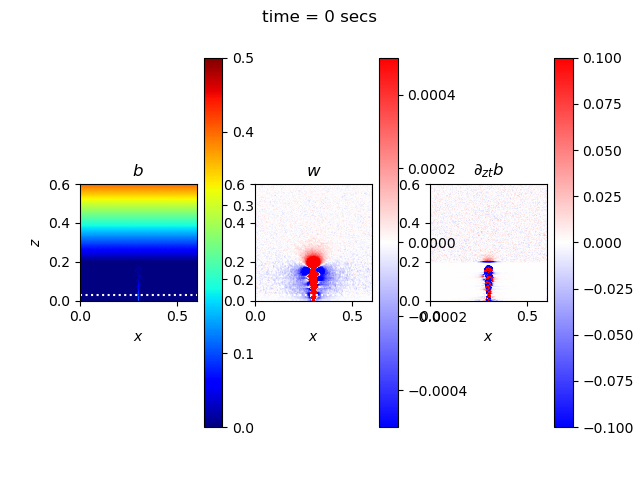

In [8]:
print("Initialising mp4 writer...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, bitrate=1800)

print("Starting plot...")
anim = animation.FuncAnimation(fig, animate, interval=500, frames=NSAMP, repeat=True)
now = datetime.now()
#anim.save(save_dir+'shear_%s.mp4'%now.strftime("%d-%m-%Y"),writer=writer)
plt.show()